# **TASK** **1** - **Exploratory Data Analysis (EDA)** with **Twitter** datasets given by **Spotle.ai**

## Team Name - **KeenNinjas**

Team Members :-

**Abhinav Sharma**

**Krishna Chaitanya Vadduri**

**Rishabh Purohit**

**Madhukar Paila**

### **Importing the Libraries**

We start off by importing the python libraries which will be used for the task.

List of Python Libraries Used
(with their source code/documentation in braces):-

*   Numpy (https://numpy.org/)
*   Pandas (https://pandas.pydata.org/)
*   Matplotlib (https://matplotlib.org/)
*   WordCloud (https://amueller.github.io/word_cloud/index.html)
*   Plotly (https://github.com/plotly/plotly.py)
*   Cufflinks (https://github.com/santosjorge/cufflinks)





In [1]:
import numpy as np
import pandas as pd
import warnings
import re
#Visualisation
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings("ignore")
%matplotlib inline
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected = True)

In [2]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

Here we imported the 'tweets_corona.txt' dataset which is the dataset provied by Spotle.ai to perform EDA . Also we edited the dataframe accordingly.

In [6]:
text = r"tweets_corona.txt"
splitLine = []
oFile = open(text, 'r', encoding="utf8")
line = oFile.readline()
while line:
    splitLine.append(line.split('\n'))
    line = oFile.readline()
oFile.close()

In [7]:
tweets = []
for sublist in splitLine:
    for item in sublist:
        tweets.append(item)

### **Sub Task 1** - A tag cloud depicting what topics / Word were being talked about on Twitter



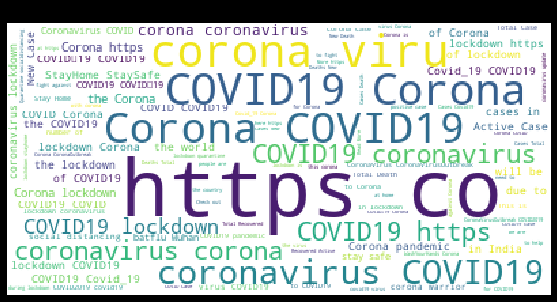

In [8]:
def word_cloud(tweets):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color="white", stopwords=stopwords, random_state = 2016).generate(" ".join([tw for tw in tweets]))
  plt.figure( figsize=(10,5), facecolor='k')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title("Twitter WordCloud")
word_cloud(tweets)

The required wordcloud is displayed above.

### **Sub Task 2** - Which hashtag trended (Hashtags are words or phrases beginning with # eg #COVID)

Extracting the hashtags and their value counts: 

In [9]:
raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j) for j in [i for i in raw.split() if i.startswith("#")]]
df_hash = pd.DataFrame({"hashtag": tags})
print(df_hash['hashtag'].value_counts().head(10))

#COVID19        49016
#Corona         30586
#lockdown       23420
#coronavirus    21504
#corona         19609
#covid19        18718
#Covid19         8530
#Covid_19        6145
#COVIDー19        6056
#StayHome        4796
Name: hashtag, dtype: int64


In [10]:
df_hashtag = df_hash['hashtag'].value_counts().head(10)

We extracted the required hashtags from the database and made a dataframe of those twitter hastags and their value counts which were extracted from the dataset by the following code.

In [11]:
df_hashtag = pd.DataFrame({'hashtag':df_hashtag.index, 'val':df_hashtag.values})
df_hashtag

,hashtag,val
0,#COVID19,49016
1,#Corona,30586
2,#lockdown,23420
3,#coronavirus,21504
4,#corona,19609
5,#covid19,18718
6,#Covid19,8530
7,#Covid_19,6145
8,#COVIDー19,6056
9,#StayHome,4796


Following is the code to plot a bar chart for the most trending twitter hashtags:-

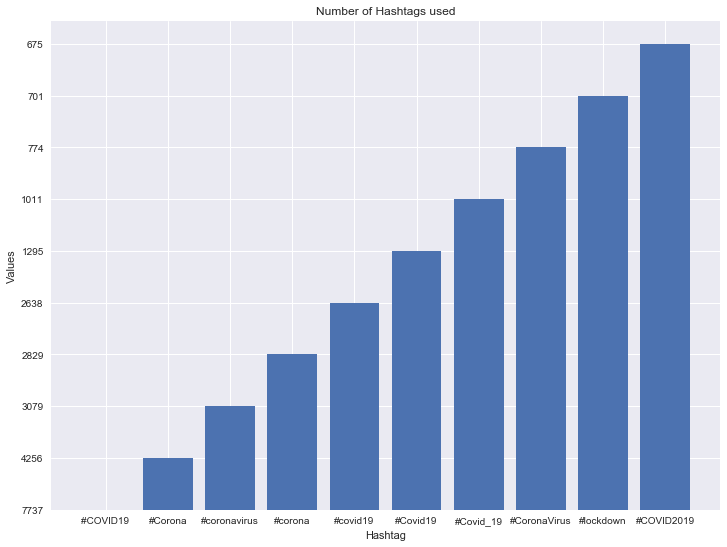

In [12]:
plt.figure(figsize=(12,9))
plt.style.use("seaborn")
objects = ('#COVID19 ','#Corona','#coronavirus','#corona','#covid19','#Covid19','#Covid_19','#CoronaVirus','#lockdown','#COVID2019')
y_pos = np.arange(len(objects))
performance = ['7737','4256','3079','2829','2638','1295','1011','774','701','675']

plt.bar(y_pos, performance, align='center', alpha=1.0, width=0.8)
plt.xticks(y_pos, objects)
plt.xlabel('Hashtag')
plt.ylabel('Values')
plt.title('Number of Hashtags used')

plt.show()

Following is the code to plot a pie chart for the most trending twitter hashtags:-

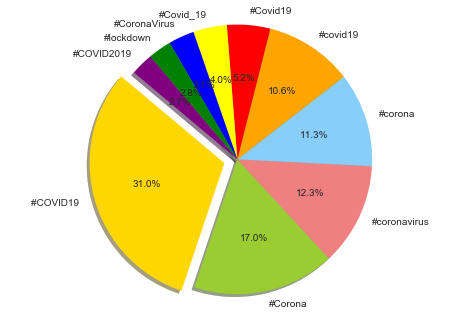

In [13]:
labels =('#COVID19 ','#Corona','#coronavirus','#corona','#covid19','#Covid19','#Covid_19','#CoronaVirus','#lockdown','#COVID2019')
sizes = ['7737','4256','3079','2829','2638','1295','1011','774','701','675']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange','red','yellow','blue','green','purple']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

We plotted a pie-chart for the trending Hashtags.

Following is the code to plot a bar-chart (using plotly library) for the the most trending twitter hashtags:-

In [14]:
configure_plotly_browser_state()
import plotly.express as px
fig = px.bar(df_hashtag, x='hashtag', y='val' , hover_data=['val'], color='val')
fig.show()

We displayed a bar-chart in descending order for the trending Hashtags.

### **Sub Task 3** - Which Twitter Handler which dominated conversation on Twitter


Following is the code to get the most trending twitter handles by using the keyword '@' :-

In [15]:
raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j) for j in [i for i in raw.split() if i.startswith("@")]]
df_handler = pd.DataFrame({"handler": tags})
print(df_handler)

                handler
0      @HealthMedicalE1
1               @diprjk
2        @kansalrohit69
3        @DrSyedSehrish
4          @MoHFW_INDIA
...                 ...
59424      @DrRPNishank
59425   @CMOMaharashtra
59426      @HRDMinistry
59427     @narendramodi
59428        @cmnishank

[59429 rows x 1 columns]


In [16]:
df=df_handler['handler'].value_counts().head(10)
df

@narendramodi       1455
@PMOIndia           1295
@realDonaldTrump     837
@YouTube             725
@WHO                 666
                     649
@news_pandemic       559
@MoHFW_INDIA         446
@AmitShah            426
@Olacabs             348
Name: handler, dtype: int64

We made a dataframe of those twitter handles extracted from the dataset in the following code.

In [17]:
df_handlers = pd.DataFrame({'handler':df.index, 'val':df.values})
df_handlers

,handler,val
0,@narendramodi,1455
1,@PMOIndia,1295
2,@realDonaldTrump,837
3,@YouTube,725
4,@WHO,666
5,,649
6,@news_pandemic,559
7,@MoHFW_INDIA,446
8,@AmitShah,426
9,@Olacabs,348


Following is the code to plot a bar-chart for the the most dominating twitter handles :-

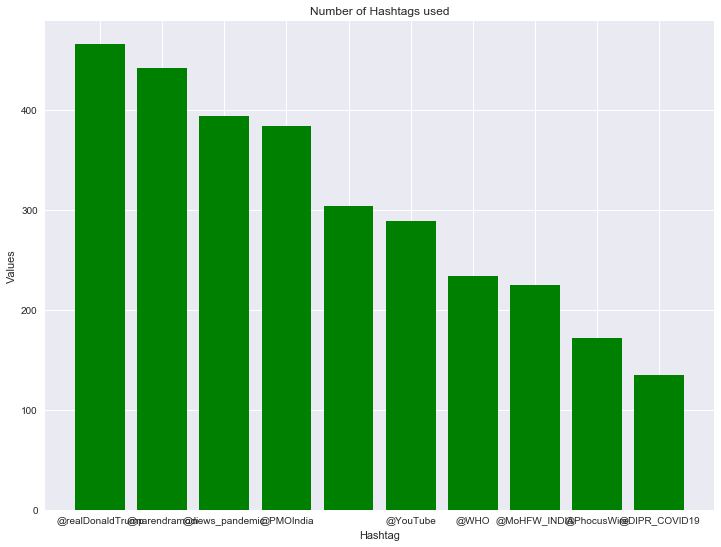

In [18]:
plt.figure(figsize=(12,9))
plt.style.use("seaborn")
objects = ('@realDonaldTrump','@narendramodi','@news_pandemic','@PMOIndia','    ','@YouTube','@WHO','@MoHFW_INDIA','@PhocusWire','@DIPR_COVID19')
y_pos = np.arange(len(objects))
performance = [466,442,394,384,304,289,234,225,172,135]

plt.bar(y_pos, performance, align='center', alpha=1.0, width=0.8, color='green')
plt.xticks(y_pos, objects)
plt.xlabel('Hashtag')
plt.ylabel('Values')
plt.title('Number of Hashtags used')

plt.show()

Following is the code to plot a pie chart for the the most dominating twitter handles :-

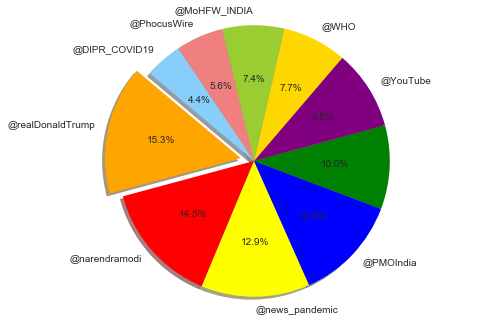

In [19]:
labels =('@realDonaldTrump','@narendramodi','@news_pandemic','@PMOIndia','    ','@YouTube','@WHO','@MoHFW_INDIA','@PhocusWire','@DIPR_COVID19')
sizes = [466,442,394,384,304,289,234,225,172,135]
colors = ['orange','red','yellow','blue','green','purple','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Following is the code to plot a bar-chart (using plotly library) for the the most dominating twitter handles :-

In [20]:
configure_plotly_browser_state()

fig = px.bar(df_handlers, x='handler', y='val' , hover_data=['val'], color='val')
fig.show()

### You've reached the end of the notebook.

You've reached the end of the notebook


This IPython notebook contains all the code, required details, plots and all EDA performed on the dataset provieded to us by Spotle.ai. Each step taken during the EDA has been explained here.





This conclues Assignment for Team - **KeenNinjas**